# **GoogLeNet**
Original paper: [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)

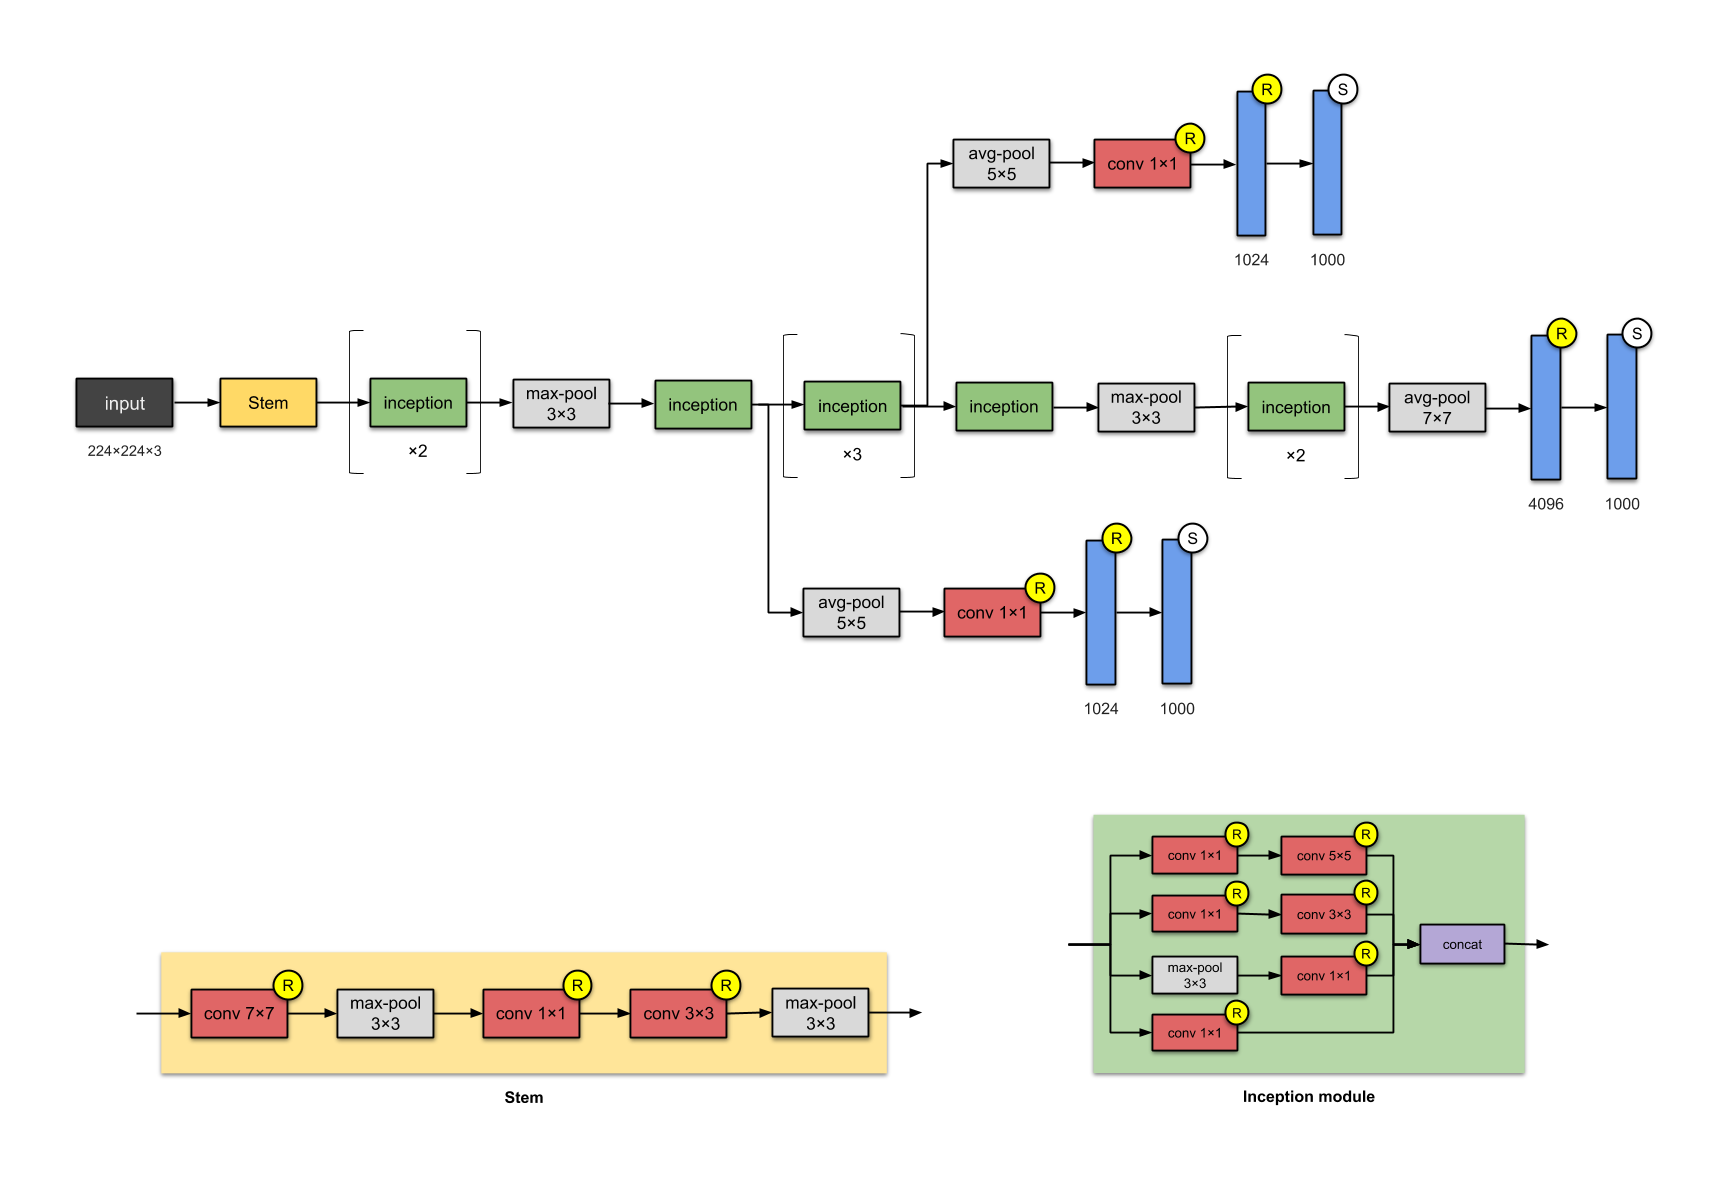

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 56, 56, 64)   4160        max_pooling2d_3[0][0]            
____________________________________________________________________________________________

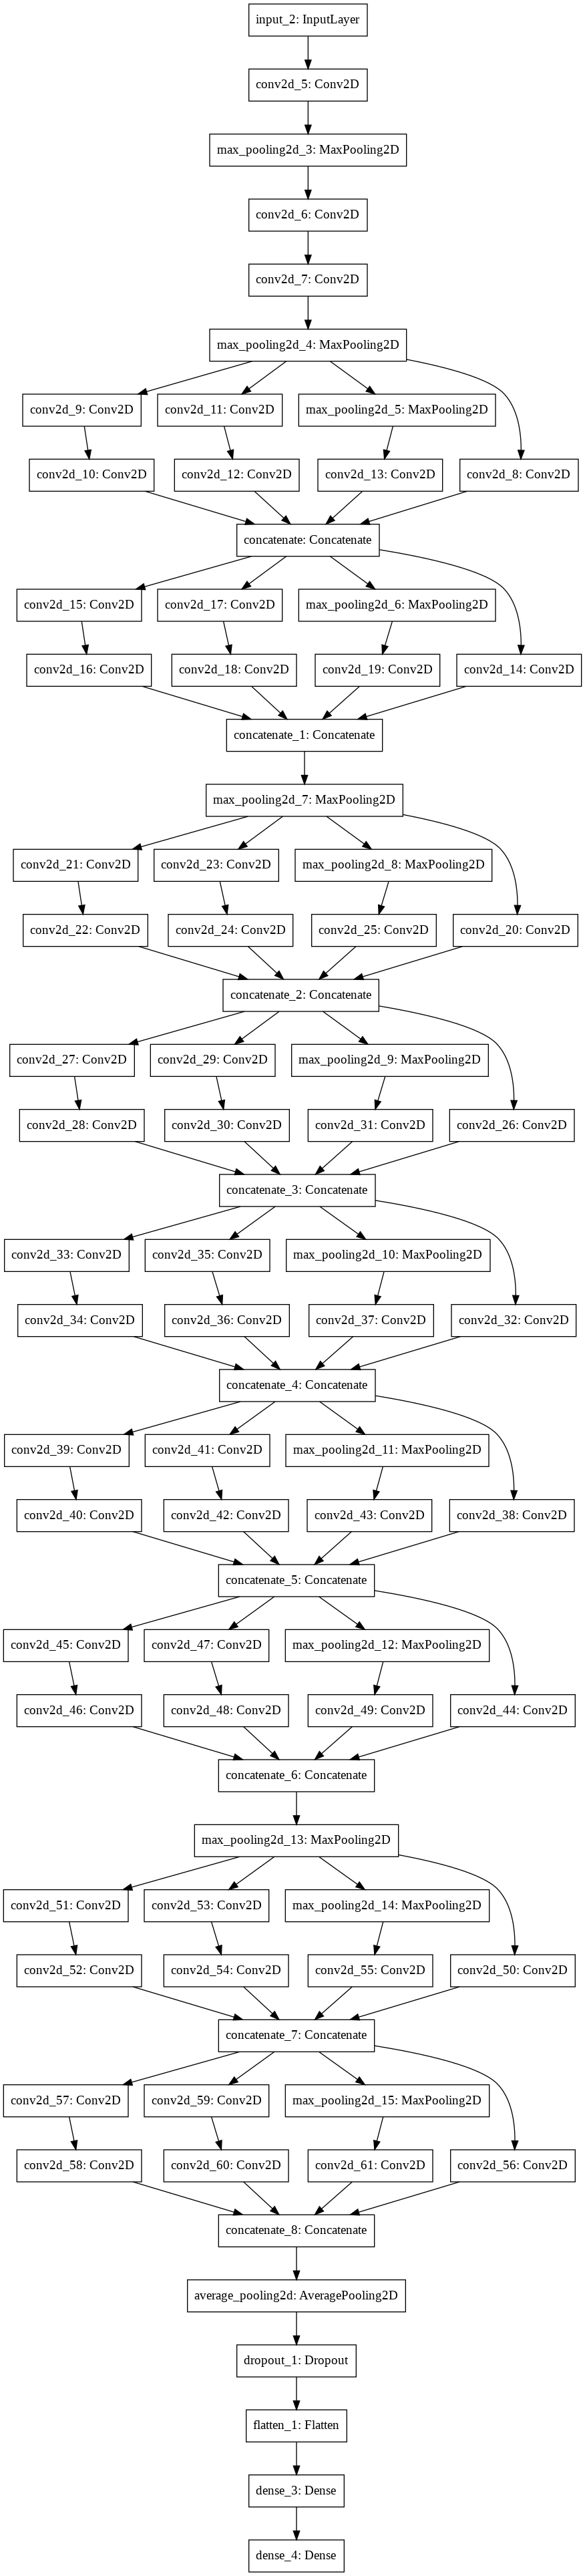

In [3]:
# Imports
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Concatenate, \
    AvgPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

# Stem block
def stem_block(input) :
    sb = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', 
                activation='relu')(input)
    sb = MaxPool2D(pool_size=3, strides=2, padding='same')(sb)
    sb = Conv2D(filters=64, kernel_size=1, activation='relu')(sb)
    sb = Conv2D(filters=192, kernel_size=3, padding='same', 
                activation='relu')(sb)
    sb = MaxPool2D(pool_size=3, strides=2)(sb)
    return sb

# Inception block
# You can build a simple model to visualize the result of this function 
# to test the Inception block.
def inception_block(x, filters):

    c1 = Conv2D(filters=filters[0], kernel_size=1, activation='relu')(x)

    c2 = Conv2D(filters=filters[1], kernel_size=1, activation='relu')(x)
    c2 = Conv2D(filters=filters[2], kernel_size=3, padding='same', 
                activation='relu')(c2)

    c3 = Conv2D(filters=filters[3], kernel_size=1, activation='relu')(x)
    c3 = Conv2D(filters=filters[4], kernel_size=5, padding='same', 
                activation='relu')(c3)

    mp = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    c4 = Conv2D(filters=filters[5], kernel_size=1, activation='relu')(mp)

    output = Concatenate()([c1, c2, c3, c4])
    return output

# Input
input = Input(shape=(224, 224, 3))

# Blocks
my_model = stem_block(input)

my_model = inception_block(my_model, filters=[64, 96, 128, 16, 32, 32])
my_model = inception_block(my_model, filters=[128, 128, 192, 32, 96, 64])
my_model = MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

my_model = inception_block(my_model, filters=[192, 96, 208, 16, 48, 64])
my_model = inception_block(my_model, filters=[160, 112, 224, 24, 64, 64])
my_model = inception_block(my_model, filters=[128, 128, 256, 24, 64, 64])
my_model = inception_block(my_model, filters=[112, 144, 288, 32, 64, 64])
my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
my_model = MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
my_model = inception_block(my_model, filters=[384, 192, 384, 48, 128, 128])
my_model = AvgPool2D(pool_size=7, strides=1)(my_model)
my_model = Dropout(rate=0.4)(my_model)

# Dense layers
my_model = Flatten()(my_model)
my_model = Dense(units=4096, activation='relu')(my_model)

# Output layer
output = Dense(units=1000, activation='softmax')(my_model)

# Model
GoogLeNet_model = Model(inputs=input, outputs=output)

print(GoogLeNet_model.summary())

from tensorflow.keras.utils import plot_model
plot_model(GoogLeNet_model)